In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Cumulative_water_vapor_amount.parquet.gzip")

data = pd.read_parquet(datafile_path)

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.253555,0.253399,0.253235,0.253065,0.252887,0.252702,0.252509,0.252310,0.252104,0.251891,...,0.254700,0.254620,0.254533,0.254437,0.254334,0.254223,0.254105,0.253978,0.253845,0.253703
-88.3125,0.289526,0.288588,0.287672,0.286860,0.286034,0.285196,0.284345,0.283482,0.282607,0.281721,...,0.296172,0.295666,0.295138,0.294588,0.294018,0.293428,0.292816,0.292185,0.291354,0.290448
-87.1875,0.313733,0.312180,0.310609,0.309022,0.307418,0.305734,0.303936,0.302126,0.300306,0.298476,...,0.330958,0.328998,0.327004,0.324977,0.322917,0.321224,0.319765,0.318286,0.316787,0.315269
-86.0625,0.329785,0.326905,0.324006,0.321089,0.318154,0.315204,0.312386,0.309891,0.307388,0.304697,...,0.359526,0.355255,0.352336,0.349391,0.346598,0.343856,0.341089,0.338298,0.335482,0.332644
-84.9375,0.339713,0.335398,0.331744,0.328077,0.324400,0.320713,0.317018,0.313316,0.309609,0.305898,...,0.389243,0.384289,0.379301,0.374282,0.369232,0.364154,0.359050,0.353922,0.348771,0.344179


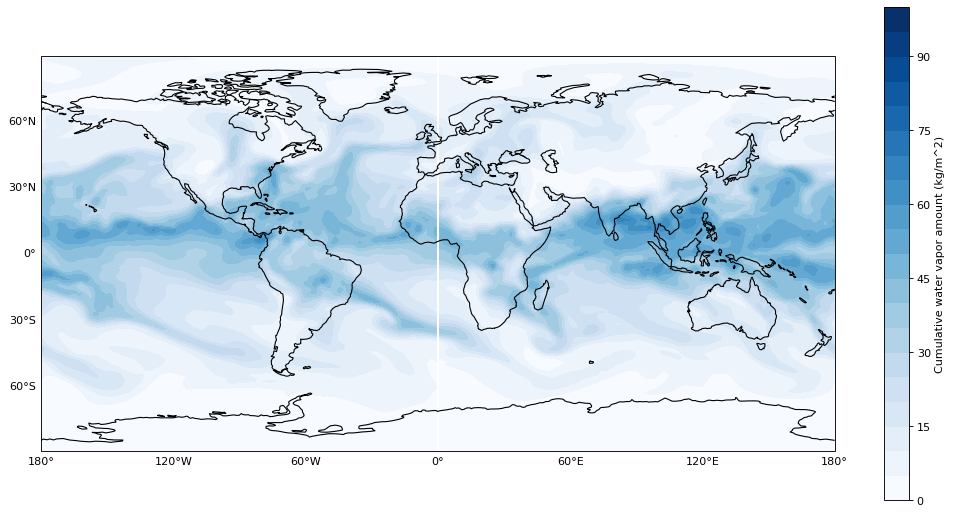

In [3]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = [i for i in range(0, 101, 5)]
cmap = cm.Blues
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Cumulative water vapor amount (kg/m^2)")

plt.show()
plt.close()

In [4]:
data

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.253555,0.253399,0.253235,0.253065,0.252887,0.252702,0.252509,0.252310,0.252104,0.251891,...,0.254700,0.254620,0.254533,0.254437,0.254334,0.254223,0.254105,0.253978,0.253845,0.253703
-88.3125,0.289526,0.288588,0.287672,0.286860,0.286034,0.285196,0.284345,0.283482,0.282607,0.281721,...,0.296172,0.295666,0.295138,0.294588,0.294018,0.293428,0.292816,0.292185,0.291354,0.290448
-87.1875,0.313733,0.312180,0.310609,0.309022,0.307418,0.305734,0.303936,0.302126,0.300306,0.298476,...,0.330958,0.328998,0.327004,0.324977,0.322917,0.321224,0.319765,0.318286,0.316787,0.315269
-86.0625,0.329785,0.326905,0.324006,0.321089,0.318154,0.315204,0.312386,0.309891,0.307388,0.304697,...,0.359526,0.355255,0.352336,0.349391,0.346598,0.343856,0.341089,0.338298,0.335482,0.332644
-84.9375,0.339713,0.335398,0.331744,0.328077,0.324400,0.320713,0.317018,0.313316,0.309609,0.305898,...,0.389243,0.384289,0.379301,0.374282,0.369232,0.364154,0.359050,0.353922,0.348771,0.344179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.9375,4.006772,4.004973,4.003696,4.002942,4.002710,4.003002,4.000872,3.986826,3.972833,3.958896,...,3.810410,3.825257,3.840846,3.857173,3.878034,3.900399,3.923326,3.946806,3.970830,3.995390
86.0625,4.180483,4.164857,4.149417,4.134169,4.118823,4.102247,4.085821,4.069552,4.053446,4.037509,...,4.170551,4.167936,4.165734,4.163946,4.162573,4.161616,4.166361,4.172421,4.178663,4.185086
87.1875,4.312982,4.300714,4.288630,4.276733,4.265029,4.253522,4.242217,4.231118,4.220228,4.209553,...,4.381009,4.373741,4.366645,4.359724,4.352980,4.346416,4.340035,4.333839,4.327830,4.322011
88.3125,4.532911,4.524676,4.516585,4.508642,4.500849,4.493211,4.485728,4.478406,4.471246,4.464250,...,4.573625,4.569221,4.564943,4.560795,4.556777,4.552892,4.549140,4.545524,4.542044,4.538701
